# Distributions and Estimators

G. Richards, 2016

Resources for this material include Ivezic Sections 3.2-3.5, Karen' Leighly's [Bayesian Statistics Lecture](http://seminar.ouml.org/lectures/bayesian-statistics/), and Bevington's book.

Our goal is ultimately to figure out the *distribution* from which our data is drawn, i.e., we want to know the *model*.  For example, let's say that we are trying to characterize the population of asteroids in the Solar System.  Maybe their sizes have a Gaussian distribution (with some characteristic size), or maybe they have a flat distribution (with equal numbers over a large range of sizes).  Or maybe the distribution is a power-law, with lots of little asteroids and very few big ones.  Or maybe it is a power-law in the other direction: very few little ones and lots of big ones.  If you are the first person to discover asteroids, then *you don't know*.  Our job is to figure that out: based entirely on the data.

That leads us to the need for **estimators**.  Since we don't know the distribution, we have to estimate it.  

So, the book spends a lot of time talking about estimators and possible distributions.  

Let's first review some commonly computed statistical properties of a data set.

In [2]:
# Execute this cell
import numpy as np
import scipy.stats
from astroML import stats as astroMLstats
data = np.random.random(1000)

The **arithmetic mean** (or Expectation value) is

$$\mu = E(x) = \int_{-\infty}^{\infty} x h(x) dx,$$

where $h(x)$ must be properly normalized and the integral gets replaced by a sum for discrete distributions.

Specifically, this is the expecation value of $x$.  If you want the expectation value of something else--say $x^2$ or $(x-\mu)^2$, you replace $x$ with that.

In [ ]:
# Execute this cell
mean = np.mean(data)
print mean

While it is perhaps most common to compute the mean, the median is a more *robust* estimator of the (true) mean location of the distribution.  That's because it is less affected by outliers.

In [ ]:
# Execute this cell.  Think about what it is doing.
median = np.median(data)
mask = data>0.75
data[mask] = data[mask]*2
newmedian = np.median(data)
newmean = np.mean(data)
print median,newmedian
print mean,newmean

In addition to the "average", we'd like to know something about **deviations** from the average.  The simplest thing to compute is $$d_i = x_i - \mu.$$  However, the average deviation is zero by definition of the mean.  The next simplest thing to do is to compute the mean absolute deviation:
$$\frac{1}{N}\sum|x_i-\mu|,$$
but the absolute values can hide the true scatter of the distribution [in some cases](http://www.mathsisfun.com/data/standard-deviation.html).  So the next simplest thing to do is to square the differences $$\sigma^2 = \frac{1}{N}\sum(x_i-\mu)^2,$$ which we call the **variance**.

Indeed the *variance* is just expectation value of $(x-\mu)^2$

$$\sigma^2 = V = \int_{-\infty}^{\infty}  (x-\mu)^2 h(x) dx,$$

where, again,  the integral gets replaced by a sum for discrete distributions.

In [18]:
# Execute this cell
var = np.var(data)

And we define the **standard deviation** as
$$\sigma = \sqrt{V}$$

In [19]:
# Execute this cell
std = np.std(data)

There is also the Median Absolute Deviation (MAD) given by
$${\rm median} (|x_i-{\rm median}(\{x_i\})|)$$
where $\sigma = 1.4826\,{\rm MAD}$ for a Gaussian distribution.

Percentiles, $q_p$, are computed as
$$\frac{p}{100} = \int_{-\infty}^{q_p}h(x) dx$$

For example, the 25th, 50th, and 75th percentiles:

In [14]:
# Complete this cell and execute
q25,q50,q75 = # Complete

Where we call the difference between the 25th and 75th percentiles, $q_{75} - q_{25}$, the *interquartile range*.

The median and interquartile range are more _robust_ than the mean and standard deviation.  So, one can create a standard deviation like measurement (at least for a Gaussian) from the interquartile range as
$\sigma_G = 0.7413(q_{75} - q_{25})$, which we saw last time.  One reason to use this is the same as for the median.  $\sigma_G$ is a more *robust* estimator of the scale of the distribution.  The normalization makes it *unbiased* for a perfect Gaussian (more on that later).

In [ ]:
# Execute this cell
astroMLstats.sigmaG(data)

The mode is the most probable value, determined from the peak of the distribution, which is the value where the derivative is 0:
$$ \left(\frac{dh(x)}{dx}\right)_{x_m} = 0$$

In [22]:
# Execute this cell
mode = scipy.stats.mode(data)

Another way to estimate the mode (at least for a Gaussian distribution) is
$$x_m = 3q_{50} - 2\mu$$

In [23]:
# Execute this cell
modealt = 3*q50 - 2*mean

Other useful measures include the "higher order" moments (the skewness and kurtosis):

In [17]:
# Execute this cell
skew = scipy.stats.skew(data)
kurt = scipy.stats.kurtosis(data)

In [ ]:
# Excute this cell
print mean, median, var, std, skew, kurt, mode.mode, modealt, q25, q50, q75

We could do the same with a normal distribution:

In [42]:
# Complete and Execute this cell
ndata = # Make this a normal distribution with mean=0, sigma=1 with a sample size of 10000

In [ ]:
# Compute all the above stats for this distribution
print np.mean(ndata), np.median(ndata), np.var(ndata), np.std(ndata)
print scipy.stats.skew(ndata), scipy.stats.kurtosis(ndata), scipy.stats.mode(ndata).mode
print np.percentile(ndata, [25,50,75])

### Sample vs. Population Statistics 

Statistics estimated from the *data* are called _sample statistics_ as compared to _population statistics_ which come from knowing the functional form of the pdf.  Up to now we have been computing population statistics.

Specifically, $\mu$ is the *population average*, i.e., it is the expecation value of $x$ for $h(x)$.  But we don't *know* $h(x)$.  So the **sample mean**, $\overline{x}$, is an *estimator* of $\mu$, defined as
$$\overline{x} \equiv \frac{1}{N}\sum_{i=1}^N x_i,$$
which we determine from the data itself.

Then instead of $\sigma^2$, which is the population variance, we have the **sample variance**, $s^2$, where

$$s^2 = \frac{1}{N-1}\sum_{i=1}^N(x_i-\overline{x})^2$$

Where it is $N-1$ instead of $N$ since we had to determine $\overline{x}$ from the data instead of using a known $\mu$.  Ideally one tries to work in a regime where $N$ is large enough that we can be lazy and ignore this. 

So the mean and variance of a distribution are $\mu$ and $\sigma^2$.  The *estimators* of the distribution are $\overline{x}$ (or $\hat{x}$) and $s^2$.

## Bias

If there is a difference between the *estimator* and the *population* values, we say that the estimator is **biased** (perhaps not quite the usage of the word that you are used to).  Again, more on this later.

### Uncertainty

We would also like to know the uncertainty of our estimates $\overline{x}$ and $s$.  Note that $s$ is **NOT** the uncertainty of $\overline{x}$.  Rather the uncertainty of $\overline{x}$, $\sigma_{\overline{x}}$ is 
$$ \sigma_{\overline{x}} = \frac{s}{\sqrt{N}},$$
which we call the *standard error of the mean*.

The uncertainty of $s$ itself is
$$\sigma_s = \frac{s}{\sqrt{2(N-1)}} = \frac{1}{\sqrt{2}}\sqrt{\frac{N}{N-1}}\sigma_{\overline{x}}.$$

Note that for large $N$, $\sigma_{\overline{x}} \sim \sqrt{2}\sigma_s$ and for small $N$, $\sigma_s$ is not much smaller than $s$.

## Distributions

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form or a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.


### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


In [ ]:
# Execute this cell
%matplotlib inline
%run code/fig_uniform_distribution.py

We can implement [uniform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) in `scipy` as follows.  Use the methods listed at the bottom of the link to complete the cell.

In [ ]:
# Complete and execute this cell
from scipy import stats
dist = # Complete for left edge = 0, width = 2
r = dist # Complete for 10 random draws
print r
p = dist # Complete for pdf evaluated at x=1
print p

Did you expect that answer for the pdf?  Why?  What would the pdf be if you changed the width to 4?

### Gaussian Distribution

We have already seen that the Gaussian distribution is given by
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


In [ ]:
# Execute this cell
%run code/fig_gaussian_distribution.py

In [28]:
# Complete and execute this cell
from scipy import stats
dist = # Normal distribution with mean = 0, stdev = 1
r = # 10 random draws
p = # pdf evaluated at x=0
print p,r

In [ ]:
# Uncomment the next line and run
# I just want you to know that this magic function exists.
#%load code/fig_gaussian_distribution.py

Note that the convolution of two Gaussians results in a Gaussian.  So $\mathscr{N}(\mu,\sigma)$ convolved with $\mathscr{N}(\nu,\rho)$ is $\mathscr{N}(\mu+\nu,\sqrt{\sigma^2+\rho^2})$

### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is
$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$
For $a=b=1\sigma$, we get the familar result of 68.3%.  For $a=b=2\sigma$ it is 95.4%.  So we refer to the range $\mu \pm 1\sigma$ and $\mu \pm 2\sigma$ as the 68% and 95% **confidence limits**, respectively.

Can you figure out what the probability is for $-2\sigma, +4\sigma$?  Check to see that you get the right answer for the cases above first!

In [ ]:
# Complete and execute this cell
N=10000
mu=0
sigma=1
dist = # Complete
v = np.linspace( # Complete
prob = # Complete
print prob.sum()

### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$.  Try it.

In [ ]:
# Execute this cell
x = stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x)
print y.mean()
print x

The catch here is that stats.norm(0,1) returns an object and not something that we can just do math on in the expected manner.  What *can* you do with it?  Try dir(x) to get a list of all the methods and properties.

In [ ]:
# Complete and execute this cell
dist = stats.norm(0,1) # mean = 0, stdev = 1
x = # Complete
y = # Complete
print x.mean(),np.log(y.mean())

### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would just be the usual factorial function if we were dealing with integers, but here we have half integers.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

In [ ]:
# Execute this cell
%run code/fig_chi2_distribution.py

### Student's $t$ Distribution

Another distribution that we'll see later is the Student's $t$ Distribution.

If you have a sample of $N$ measurements, $\{x_i\}$, drawn from a Gaussian distribution, $\mathscr{N}(\mu,\sigma)$, and you apply the transform
$$t = \frac{\overline{x}-\mu}{s/\sqrt{N}},$$
then $t$ will be distributed according to Student's $t$ with the following pdf (for $k$ degrees of freedom): 
$$p(x|k) = \frac{\Gamma(\frac{k+1}{2})}{\sqrt{\pi k} \Gamma(\frac{k}{2})} \left(1+\frac{x^2}{k}\right)^{-\frac{k+1}{2}}$$

As with a Gaussian, Student's $t$ is bell shaped, but has "heavier" tails.

In [ ]:
# Execute this cell
%run code/fig_student_t_distribution.py

### What's the point?

The point is that we are going to make some measurement.  And we will want to know how likely it is that we would get that measurement in our experiment as compared to random chance.  To determine that we need to know the shape of the distribution.  Let's say that we find that $x=6$.  If our data is $\chi^2$ distributed with 2 degrees of freedom, then we would integrate the $k=2$ curve above from 6 to $\infty$ to determine how likely it is that we would have gotten 6 or larger by chance.  If our distribution was instead $t$ distributed, we would get a *very* different answer.  Note that it is important that you decide *ahead of time* what the metric will be for deciding whether this result is significant or not.  More on this later, but see [this article](http://fivethirtyeight.com/features/science-isnt-broken/).

## Central Limit Theorem

One of the reasons that a Gaussian (or Normal) Distribution is so common is because of the **Central Limit Theorem**. It says that for an arbitrary distribution, $h(x)$, that has a well-defined mean, $\mu$, and standard deviation, $\sigma$, the mean of $N$ values \{$x_i$\} drawn from the distribution will follow a Gaussian Distribution with $\mathscr{N}(\mu,\sigma/\sqrt{N})$.  (A Cauchy distribution is one example where this fails.)

This theorem is the foudation for the performing repeat measurements in order to improve the accuracy of one's experiment.  It is telling us something about the *shape* of the distribution that we get when averaging.  The **Law of Large Numbers** further says that the sample mean will converge to the distribution mean as $N$ increases.

Personally, I always find this a bit confusing (or at least I forget how it works).  So, let's look at it in detail.
Start by plotting a normal distribution with $\mu=0.5$ and $\sigma=1/\sqrt{12}/\sqrt{2}$.

Now take 2 draws from using the `np.random.random` distribution and plot them as a rug plot.  Do that a couple of times (e.g., keep hitting Cntrl-Enter in the cell).

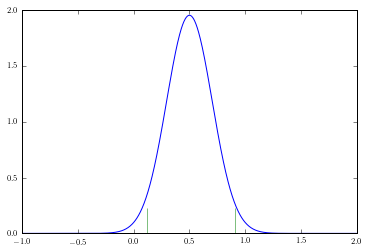

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

N= # Complete
mu= # Complete
sigma = # Complete

u = # Complete
dist = # Complete
plt.plot(u, # Complete

x = # Complete
plt.plot(x, 0*x, '|', markersize=50)

Now let's average those two draws and plot the result (in the same panel).  Do it as a histogram for 1,000,000 samples (of 2 each).  Use a stepfilled histogram that is normalized with 50% transparency and 100 bins.

In [ ]:
# Copy your code from above

# Add a histogram that is the 2-sample mean of 1,000,000 draws

yy = # Complete

plt.hist(yy, #Complete

Now instead of averaging 2 draws, average 3.  Then do it for 10.  Then for 100.  Each time for 1,000,000 samples.
Make sure that you adjust the "expected" Gaussian based on the number of draws.


In [6]:
# Copy your code from above and edit accordingly (or just edit your code from above)


For 100 you will note that your draws are clearly sampling the full range, but the means of those draws are in a *much* more restrictred range.  Moreover they are very closely following a Normal Distribution.  This is the power of the Central Limit Theorem.    We'll see this more later when we talk about **maximum likelihood**.

By the way, if your code is ugly, you can run the following cell to reproduce Ivezic, Figure 3.20 which nicely illustrates this in one plot.

In [ ]:
# Execute this cell
%run code/fig_central_limit.py

If you are confused, then watch this video from the Khan Academy:
[https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem](https://www.khanacademy.org/math/statistics-probability/sampling-distributions-library/sample-means/v/central-limit-theorem)

## Bivariate and Multivariate Distribution Functions

Up to now we have been dealing with one-dimensional distribution functions.  Let's now consider a two dimensional distribution $h(x,y)$ where $$\int_{-\infty}^{\infty}dx\int_{-\infty}^{\infty}h(x,y)dy = 1.$$  $h(x,y)$ is telling us the probability that $x$ is between $x$ and $dx$ and *also* that $y$ is between $y$ and $dy$.

Then we have the following definitions:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\mu_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}x h(x,y) dx dy$$

$$\sigma_{xy} = Cov(x,y) = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

If $x$ and $y$ are uncorrelated, then we can treat the system as two independent 1-D distributions.  This means that choosing a range on one variable has no effect on the distribution of the other.

We can write a 2-D Gaussian pdf as
$$p(x,y|\mu_x,\mu_y,\sigma_x,\sigma_y,\sigma_{xy}) = \frac{1}{2\pi \sigma_x \sigma_y \sqrt{1-\rho^2}} \exp\left(\frac{-z^2}{2(1-\rho^2)}\right),$$

where $$z^2 = \frac{(x-\mu_x)^2}{\sigma_x^2} + \frac{(y-\mu_y)^2}{\sigma_y^2} - 2\rho\frac{(x-\mu_x)(y-\mu_y)}{\sigma_x\sigma_y},$$

with $$\rho = \frac{\sigma_{xy}}{\sigma_x\sigma_y}$$
as the (dimensionless) correlation coefficient.

If $x$ and $y$ are perfectly correlated then $\rho=\pm1$ and if they are uncorrelated, then $\rho=0$.

The pdf is now not a histogram, but rather a series of contours in the $x-y$ plane.   These are centered at $(x=\mu_x, y=\mu_y)$ and are tilted at angle $\alpha$, which is given by
$$\tan(2 \alpha) = 2\rho\frac{\sigma_x\sigma_y}{\sigma_x^2-\sigma_y^2} = 2\frac{\sigma_{xy}}{\sigma_x^2-\sigma_y^2}.$$

For example (Ivezic, Figure 3.22):
![Ivezic, Figure 3.22](http://www.astroml.org/_images/fig_bivariate_gaussian_1.png)

We can define new coordinate axes that are aligned with the minimum and maximum widths of the distribution.  These are called the **principal axes** and are given by
$$P_1 = (x-\mu_x)\cos\alpha + (y-\mu_y)\sin\alpha,$$
and
$$P_2 = -(x-\mu_x)\sin\alpha + (y-\mu_y)\cos\alpha.$$

The widths in this coordinate system are
$$\sigma^2_{1,2} = \frac{\sigma_x^2+\sigma_y^2}{2}\pm\sqrt{\left(\frac{\sigma_x^2-\sigma_y^2}{2}\right)^2 + \sigma^2_{xy}}.$$

Note that the correlation vanishes in this coordinate system and the bivariate Gaussian is just a product of two univariate Gaussians.  This concept will be crucial for understanding Principal Component Analysis when we get to Chapter 7, where PCA extends this idea to even more dimensions.

In the univariate case we used $\overline{x}$ and $s$ to *estimate* $\mu$ and $\sigma$.  In the bivariate case we estimate 5 parameters: $(\overline{x},\overline{y},s_x,s_y,s_{xy})$.  

As with the univariate case, it is important to realize that outliers can bias these estimates and that it may be more appropriate to use the median rather than the mean as a more robust estimator for $\mu_x$ and $\mu_y$.  Similarly we want robust estimators for the other parameters of the fit.  We won't go into that in detail right now, but see Ivezic, Figure 3.23 for an example:

![Ivezic, Figure 3.23](http://www.astroml.org/_images/fig_robust_pca_1.png)

For an example of how to generate a bivariate distribution and plot confidence contours, execute the following cell.

In [ ]:
# Base code drawn from Ivezic, Figure 3.22, edited by G. Richards to simplify the example

from matplotlib.patches import Ellipse
from astroML.stats.random import bivariate_normal
from astroML.stats import fit_bivariate_normal

#------------------------------------------------------------
# Create 10,000 points from a multivariate normal distribution
mean = [0, 0]
cov = [[1, 0.3], [0.3, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

# Fit those data with a bivariate normal distribution
mean, sigma_x, sigma_y, alpha = fit_bivariate_normal(x,y)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.scatter(x,y,s=2,edgecolor='none')

# draw 1, 2, 3-sigma ellipses over the distribution
for N in (1, 2, 3):
    ax.add_patch(Ellipse(mean, N * sigma_x, N * sigma_y, angle=alpha * 180./np.pi, lw=1, ec='k', fc='none'))